# Tarea 2: Regresión sobre el California Housing Dataset

## Introducción

En esta tarea, el objetivo es desarrollar modelos de **regresión** que sean capaces de predecir el **precio medio de las casas** en distintas regiones de California, utilizando el *California Housing Dataset*. Este dataset es ampliamente utilizado en la literatura de *Machine Learning* para problemas de regresión.

### Objetivos
1. Cargar y explorar el **California Housing Dataset**.
2. Realizar un análisis exploratorio de los datos (EDA).
3. Aplicar técnicas de preprocesamiento y transformación de datos.
4. Desarrollar al menos dos modelos de regresión para predecir el precio medio de las casas.
5. Evaluar el rendimiento de los modelos utilizando métricas de regresión como **MAE**  ..y **RMSE**.

## Descripción del Dataset

El **California Housing Dataset** contiene información relacionada con varias características de diferentes bloques de viviendas en California- `Median Income`: Ingreso medio en el bloque.
- `House Media Age`: Edad media de las casas en el bloque.
- `Total Rooms`: Número de habitaciones.
- `Total Bedrooms`: Número de dormitorios.
- `Population`: Población en el bloque.
- `Households`: Número total de hogares.
- `Latitude`: Latitud del bloque.
- `Longitude`: Longitud del bloque.
- `Median House Value`: Valor medio de la vivienda (la variable objetivo).éano/mar.
frame=True)
df = data.frame
df.head()


## Análisis Exploratorio de Datos (EDA)

### 1. Cargar los datos

In [1]:
import pandas as pd

houses = pd.read_csv('datasets/CaliforniaHousing.csv')

#Verificar que se cargaron los datos correctamente y ver la estructura del dataset
houses.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [2]:
# Dimensiones del dataframe
houses.shape

(20640, 10)

In [6]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
# Estadisticas de los datos numericos
houses.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
# Explorando el parametro categorico
houses['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

### 2. Visualizacion de las distribuciones de las variables

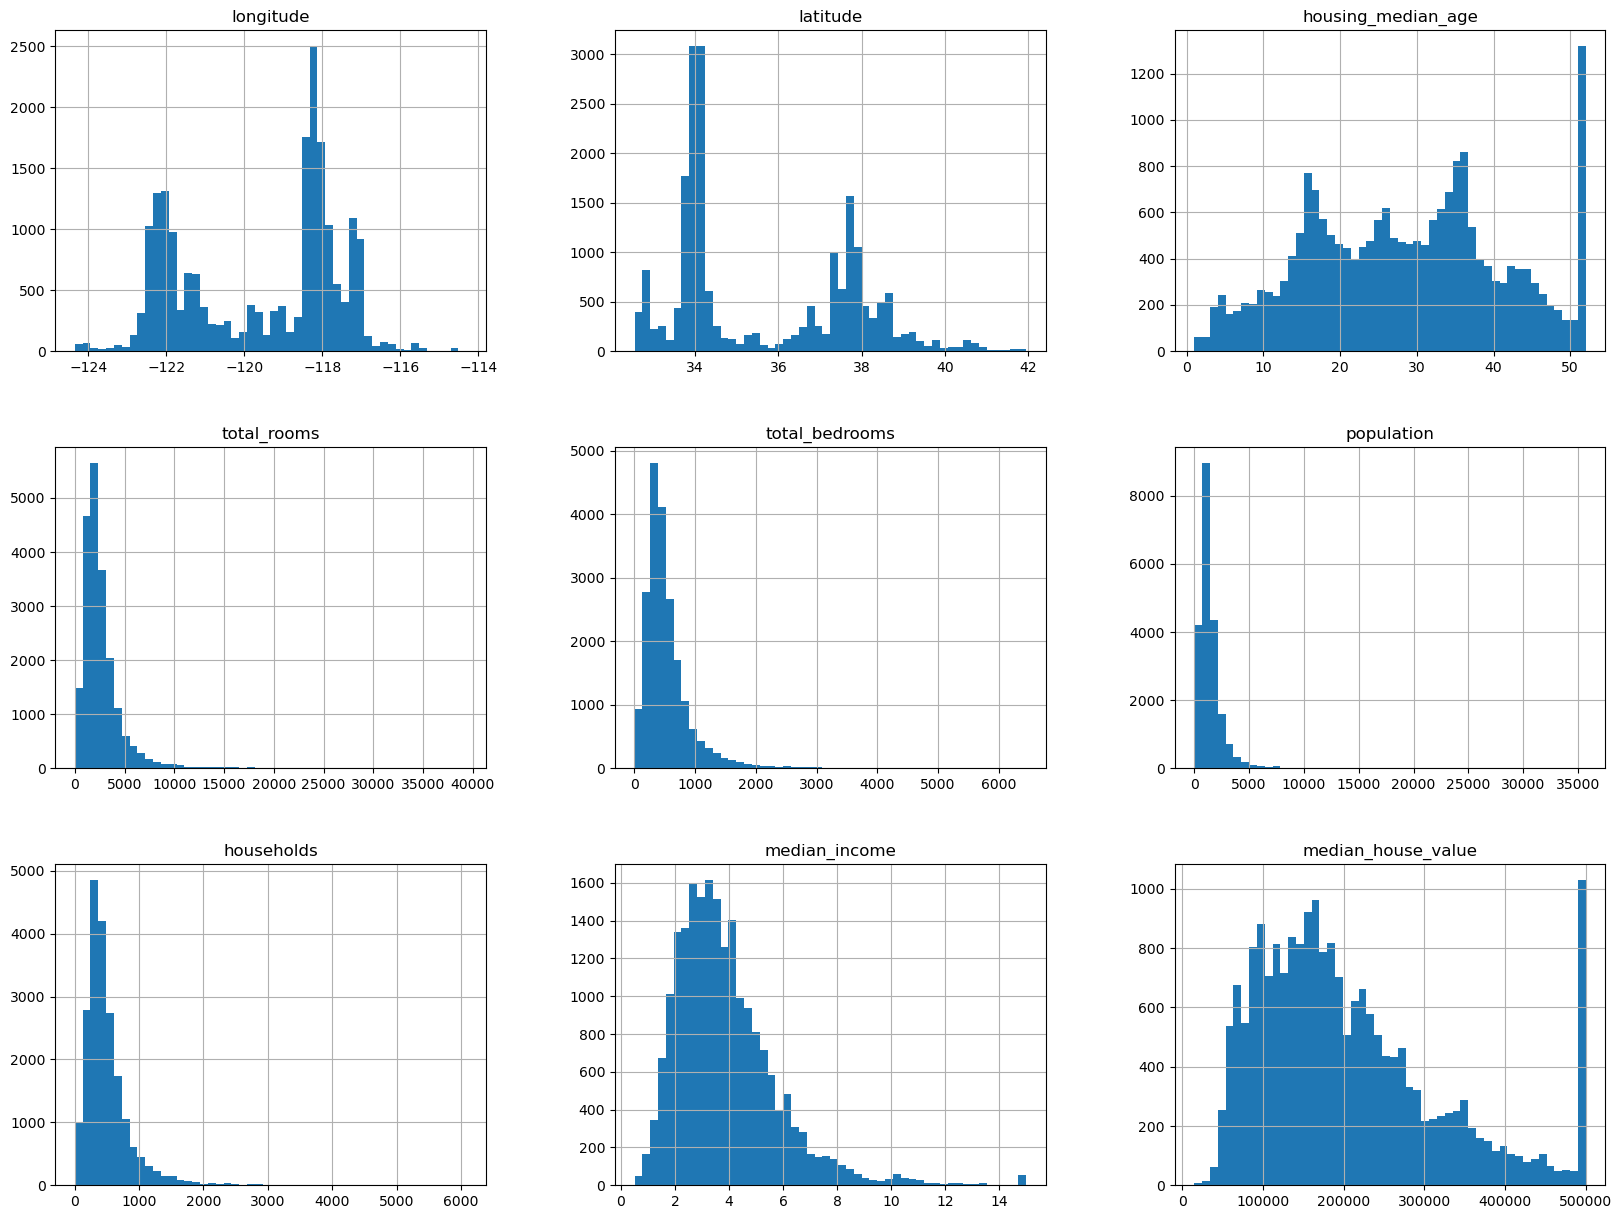

In [12]:
import matplotlib.pyplot as plt

houses.hist(bins=50, figsize=(20,15))
plt.show()

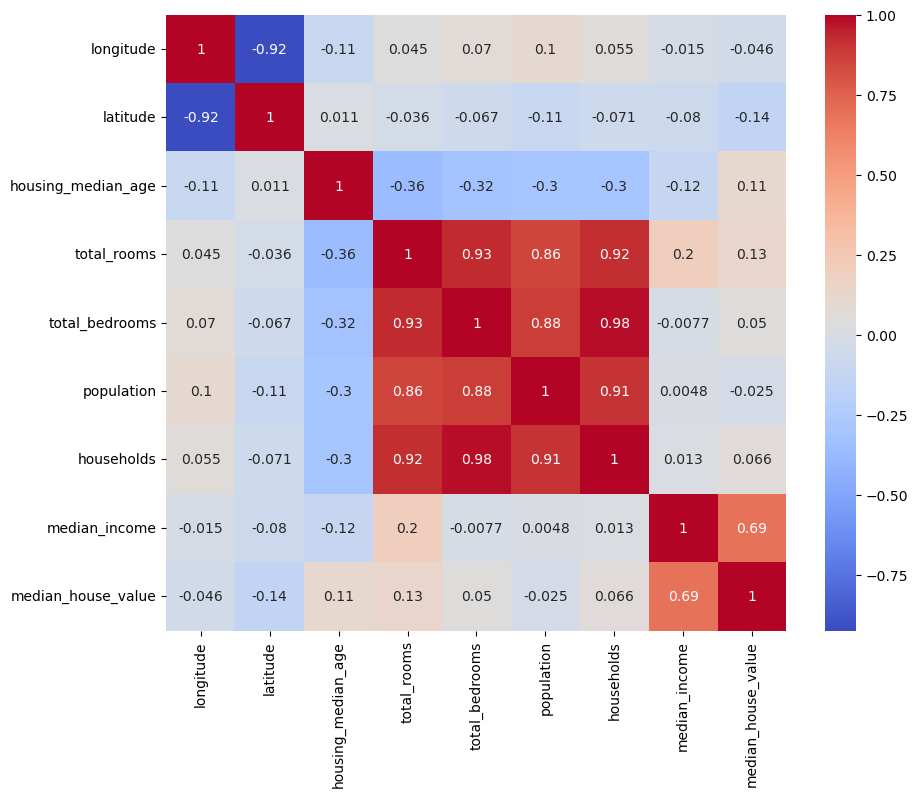

In [13]:
import seaborn as sns

corr_matrix = houses.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()


### Dividiendo en train-test dataset con Stratified Sampling 

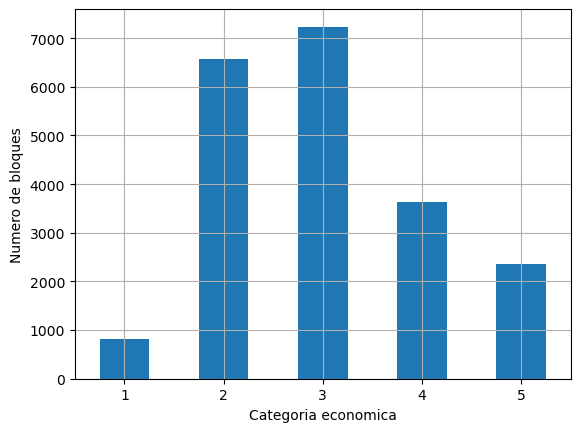

In [20]:
# Aplicando StratifiedSampling sobre media_income 
import numpy as np

houses["income_cat"] = pd.cut(houses["median_income"],
bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
labels=[1, 2, 3, 4, 5])
houses["income_cat"].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel("Categoria economica")
plt.ylabel("Numero de bloques")
plt.show()

In [22]:
from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = train_test_split(
houses, test_size=0.2, stratify=houses["income_cat"], random_state=42)
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)
houses = strat_train_set.copy()

### Visualizacion de los datos

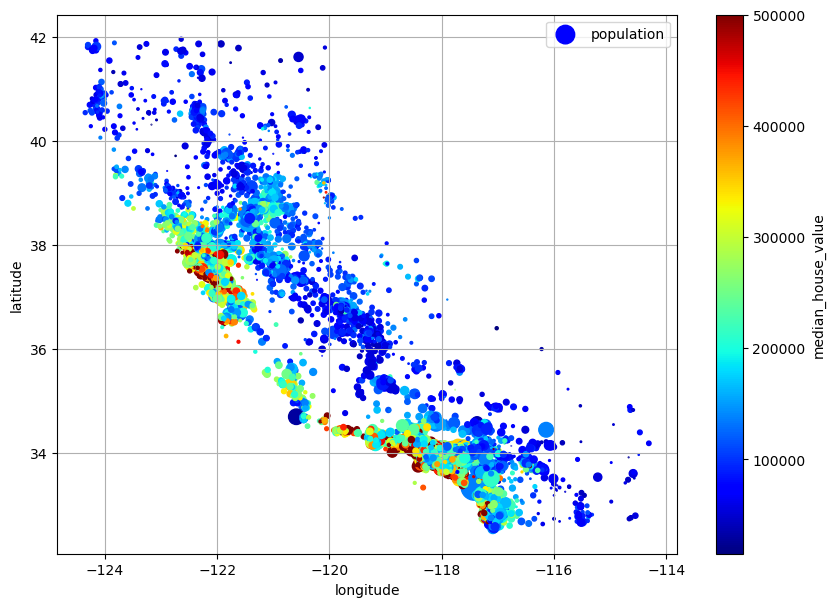

In [24]:
houses.plot(kind="scatter", x="longitude", y="latitude", grid=True,
s=houses["population"] / 100, label="population",
c="median_house_value", cmap="jet", colorbar=True,
legend=True, sharex=False, figsize=(10, 7))
plt.show()

## Feature Engineering

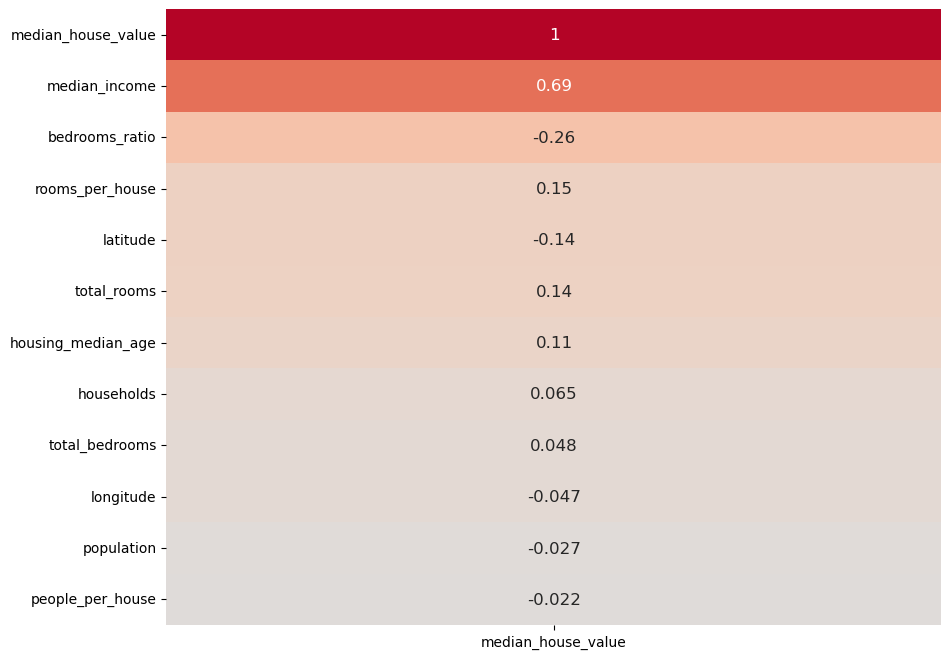

In [26]:
houses["rooms_per_house"] = houses["total_rooms"] / houses["households"]
houses["bedrooms_ratio"] = houses["total_bedrooms"] / houses["total_rooms"]
houses["people_per_house"] = houses["population"] / houses["households"]


corr_matrix = houses.corr(numeric_only=True)
sorted_corr = corr_matrix["median_house_value"].abs().sort_values(ascending=False).index
corr_values = corr_matrix.loc[sorted_corr, ["median_house_value"]]

plt.figure(figsize=(10, 8))
sns.heatmap(corr_values.abs(), annot=corr_values, cbar=False, cmap="coolwarm", vmin=-1, vmax=1, center=0.0,
            annot_kws={"size": 12}, cbar_kws={"ticks": np.linspace(0, 1, 21)})
plt.show()

# Preproccesing Data

In [28]:
# Recuperando el dataset original
houses = strat_train_set.drop("median_house_value", axis=1)
houses_labels = strat_train_set["median_house_value"].copy()

## Clean the Data

### Handling Missing Values

El atributo total_bedrooms tiene valores nulos que van a ser tratados con la tecnica de imputation

In [34]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

houses_num = houses.select_dtypes(include=[np.number])
imputer.fit(houses_num)
X = imputer.transform(houses_num)
houses_tr = pd.DataFrame(X, columns=houses_num.columns,index=houses_num.index)

### Handling Categorical Data

In [45]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
houses_cat_1hot = cat_encoder.fit_transform(houses[["ocean_proximity"]])
houses_cat_1hot


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

### Feature Scaling and Transformation